# Importação das bibliotecas básicas

In [8]:
!pip -q install plotly

In [9]:
!pip -q install yellowbrick

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Árvores de decisão

In [11]:
# Importação da biblioteca scikit-learn e da classe DecisionTreeClassifier,que implementa o algoritmo de árvore de decisão para classificação em aprendizado de máquina.

from sklearn.tree import DecisionTreeClassifier

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Base risco de crédito

In [13]:
# importar a modulo pickle (permite salvar e carregar objetos Python em arquivos binários)
import pickle

# abrir arquivo risco_credito.pkl para leitura de bytes
with open('/content/drive/MyDrive/ML e Data Sciece com python/dataset/credit_risc/risco_credito.pkl', 'rb') as f:
  # carrega os dados pickle e armaze nas variaveis X_risco_credito, y_risco_credito
  X_risco_credito, y_risco_credito = pickle.load(f)

In [14]:
# visualização dos dados contidos na variável X_risco_credito ja aplicado o labelencoder
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [15]:
# objetivo é fazer a previsão dessa variável
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [16]:
# Criação do modelo de árvore de decisão usando o critério de entropia
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')

# Treinamento do modelo com os dados de entrada (X_risco_credito) e os rótulos de classe (y_risco_credito)
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)


DecisionTreeClassifier(criterion='entropy')

In [17]:
# Obtém a importância das características (features) na árvore de decisão
arvore_risco_credito.feature_importances_


array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

In [18]:
# Obtém as classes (rótulos) aprendidas pelo modelo de árvore de decisão
arvore_risco_credito.classes_


array(['alto', 'baixo', 'moderado'], dtype=object)

O trecho de código a seguir utiliza a função plot_tree do módulo tree da biblioteca scikit-learn para visualizar a árvore de decisão treinada (arvore_risco_credito). Ele mostra o diagrama da árvore de decisão com as características (previsores) e as classes aprendidas (arvore_risco_credito.classes_). O parâmetro filled=True é usado para colorir os nós da árvore de acordo com a classe majoritária.


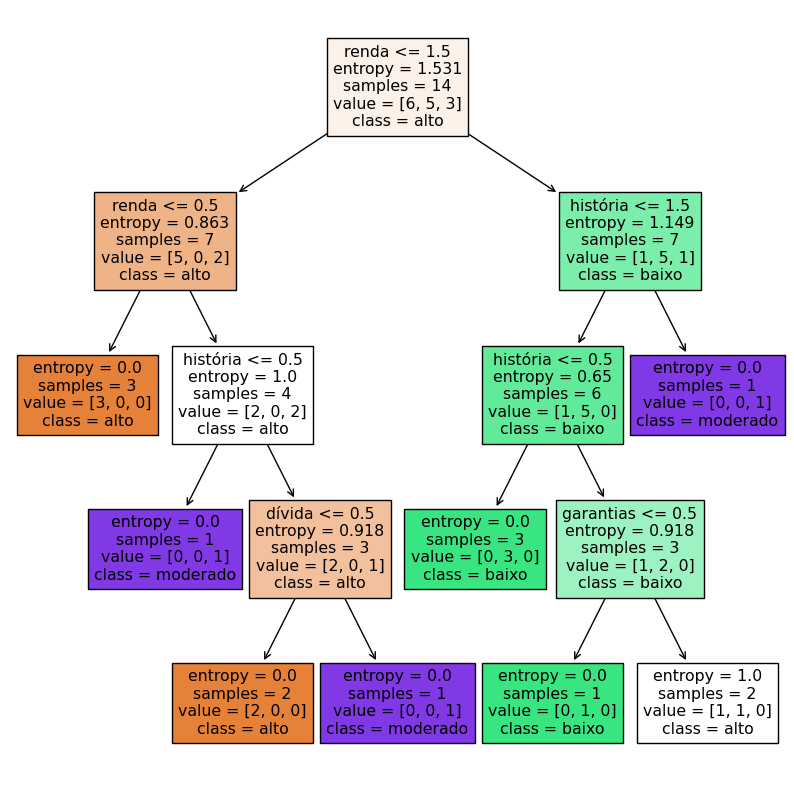

In [19]:
# Importa o módulo tree da biblioteca scikit-learn para visualização da árvore de decisão
from sklearn import tree

# Define os nomes das características dos previsores
previsores = ['história', 'dívida', 'garantias', 'renda']

# Cria uma figura e os eixos para plotar a árvore de decisão
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

# Plota a árvore de decisão treinada (arvore_risco_credito)
# Define os nomes das características e das classes
# Preenche os nós da árvore de acordo com a classe majoritária
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True); # o ponto e virgula para não vizualizar a arvore em texto, apenas o plot


In [20]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## Base credit data - 98.20%

In [22]:
with open('/content/drive/MyDrive/ML e Data Sciece com python/dataset/credit_risc/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [23]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [24]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [25]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

In [28]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

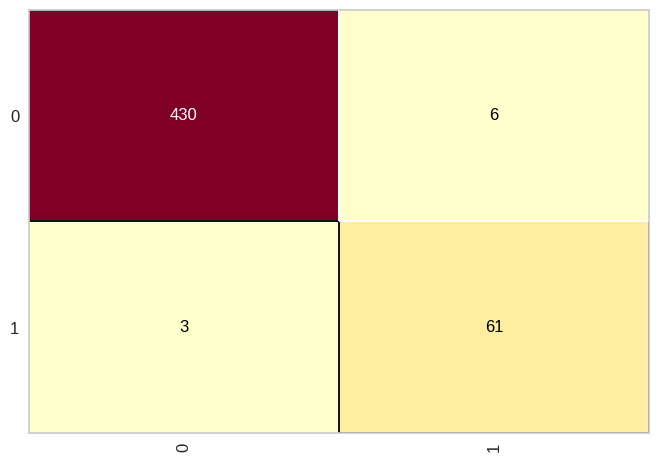

In [30]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [31]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [32]:
arvore_credit.classes_

array([0, 1])

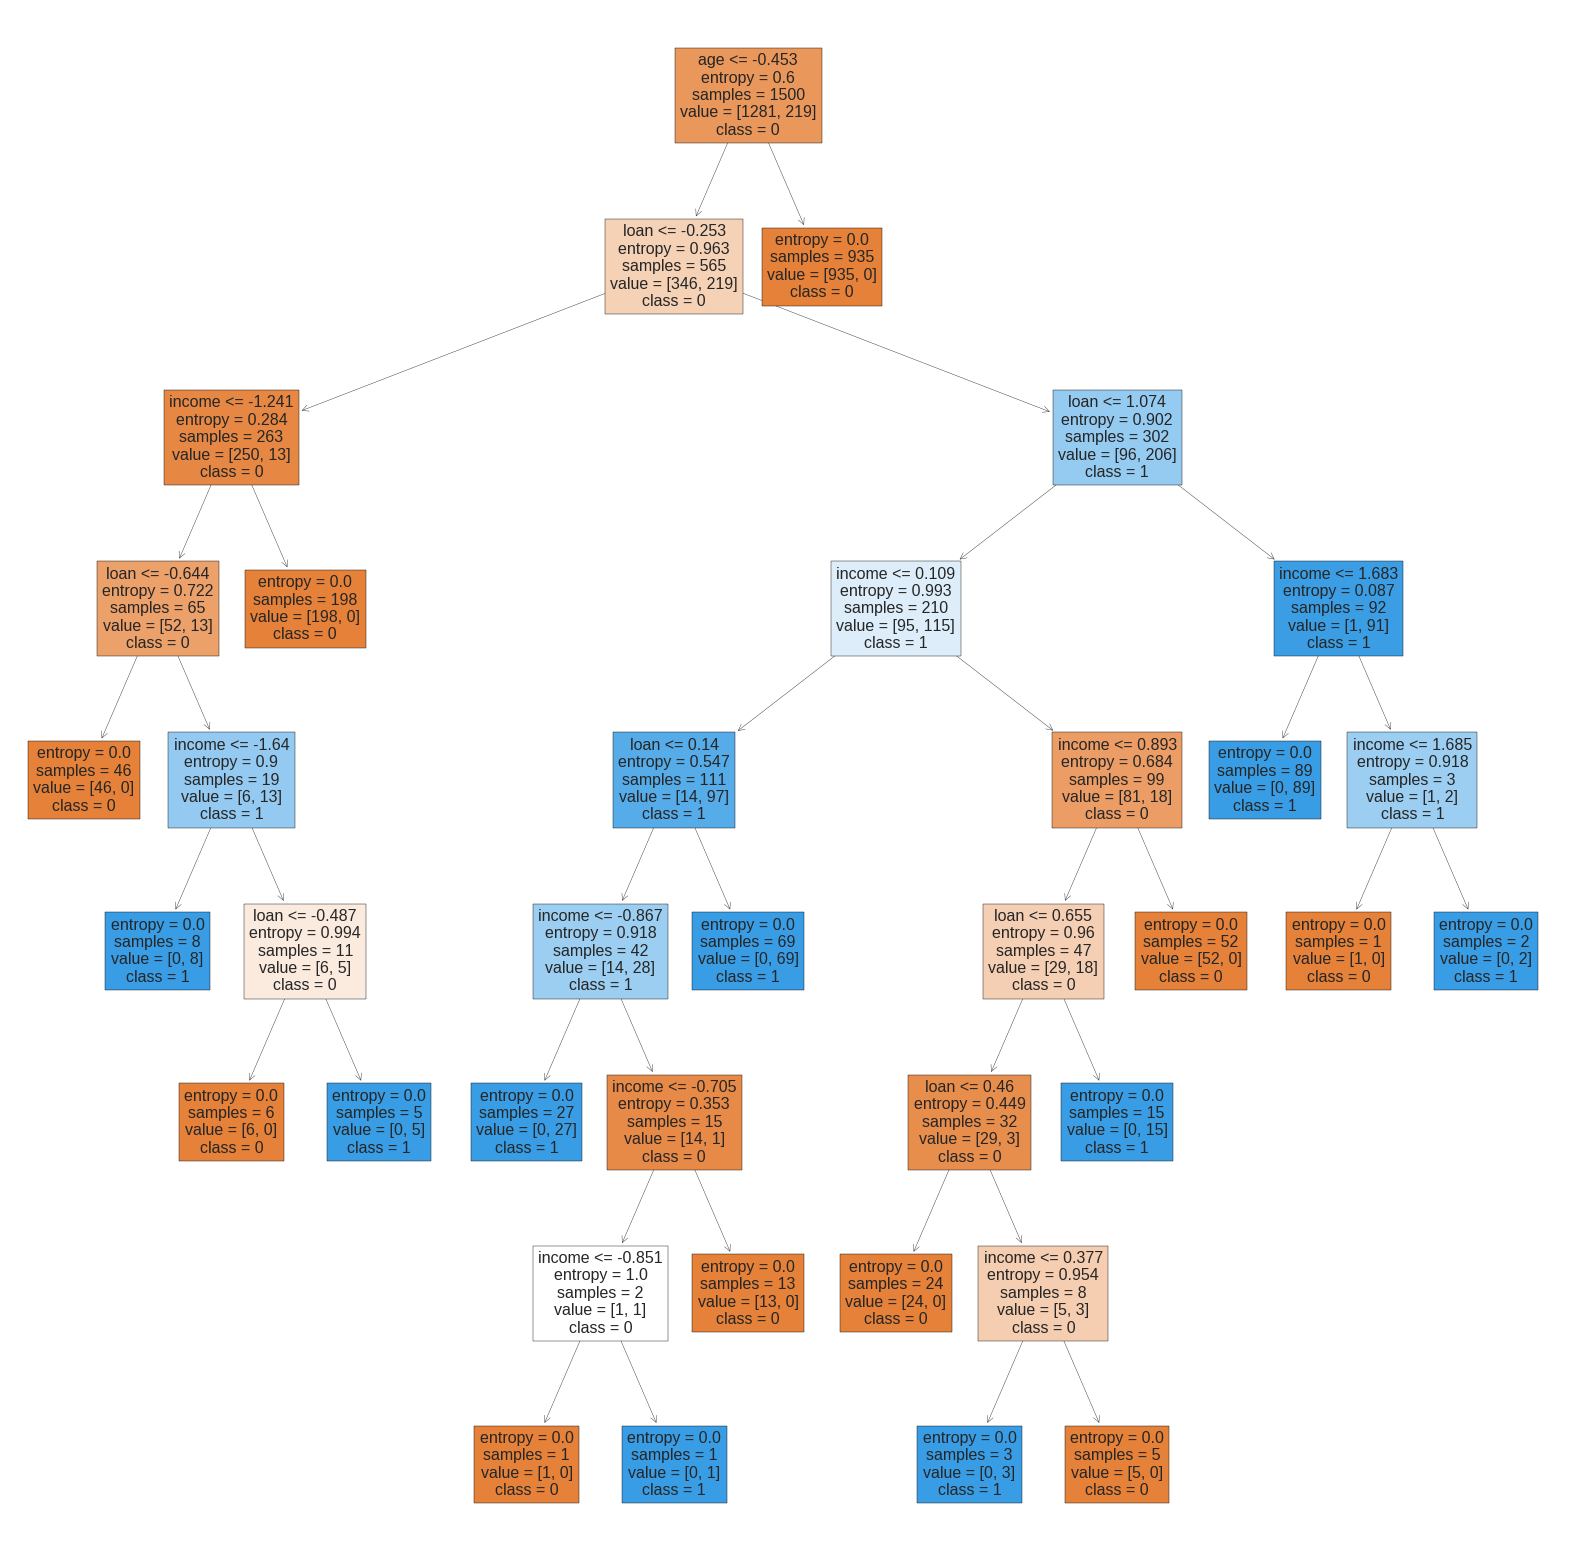

In [33]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

## Base census - 81.04%

In [34]:
with open('/content/drive/MyDrive/ML e Data Sciece com python/dataset/census/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [35]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [36]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [37]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [39]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [40]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

In [41]:
from yellowbrick.classifier import ConfusionMatrix

0.8104401228249745

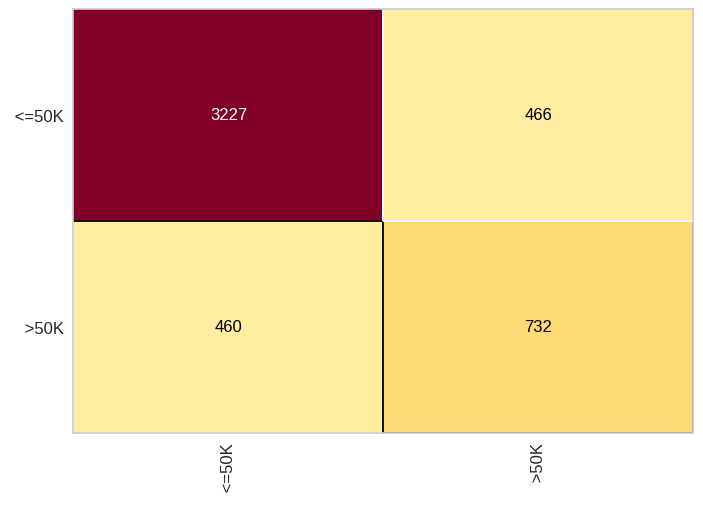

In [42]:
from yellowbrick.classifier import ConfusionMatrix
#cm = ConfusionMatrix(arvore_credit) corrigido 10/04/2021
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [43]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



* Para a classe <=50K:

  * A precisão é de 88%, o que significa que 88% das previsões para esta classe estão corretas.
  * O recall é de 87%, o que indica que o modelo identificou corretamente 87% das instâncias desta classe.
  * O F1-score é de 87%, que é uma média harmônica entre precisão e recall para esta classe.
  * O suporte (support) é 3693, o que representa o número de instâncias nesta classe no conjunto de teste.

* Para a classe >50K:

  * A precisão é de 61%, o que significa que 61% das previsões para esta classe estão corretas.
  * O recall é de 61%, indicando que o modelo identificou corretamente 61% das instâncias desta classe.
  * O F1-score é de 61%, que é uma média harmônica entre precisão e recall para esta classe.
  * O suporte (support) é 1192, o que representa o número de instâncias nesta classe no conjunto de teste.